In [1]:
from pathlib import Path

import geopandas as gpd
import numpy as np
import pandas as pd
import shapely
from palettable.colorbrewer.diverging import BrBG_10

from lonboard import Map, ScatterplotLayer
from lonboard.colormap import apply_continuous_cmap

C:\Users\INAK05404\AppData\Roaming\Python\Python39\site-packages\matplotlib\projections\__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
url = "https://ookla-open-data.s3.us-west-2.amazonaws.com/parquet/performance/type=mobile/year=2019/quarter=1/2019-01-01_performance_mobile_tiles.parquet"

In [3]:
local_path = Path("internet-speeds.parquet")
if local_path.exists():
    gdf = gpd.read_parquet(local_path)
else:
    columns = ["avg_d_kbps", "tile"]
    df = pd.read_parquet(url, columns=columns)

    tile_geometries = shapely.from_wkt(df["tile"])
    tile_centroids = shapely.centroid(tile_geometries)
    gdf = gpd.GeoDataFrame(df[["avg_d_kbps"]], geometry=tile_centroids, crs='EPSG:4326')
    gdf.to_parquet(local_path)

In [4]:
gdf.head()

,avg_d_kbps,geometry
0,5983,POINT (-160.01862 70.63722)
1,3748,POINT (-160.04059 70.63357)
2,3364,POINT (-160.04059 70.63175)
3,2381,POINT (-160.03510 70.63357)
4,3047,POINT (-160.03510 70.63175)


In [5]:
# Filter GeoDataFrame to focus on India
gdf = gdf.cx[68.1:97.4, 8.4:37.6]


In [6]:
gdf

,avg_d_kbps,geometry
1964560,7715,POINT (68.18390 37.40726)
1964561,11463,POINT (68.19489 37.41162)
1964562,4094,POINT (68.18390 37.40289)
1964564,4073,POINT (68.15643 37.27624)
1964565,3110,POINT (68.13995 37.26750)
...,...,...
2598900,26522,POINT (96.33087 16.63356)
2598901,70939,POINT (96.46271 16.57566)
2598902,12964,POINT (97.35809 16.62830)
2598903,7430,POINT (97.35809 16.52300)


In [7]:
layer = ScatterplotLayer.from_geopandas(gdf)
m = Map(layer)
m 

Map(layers=[ScatterplotLayer(table=pyarrow.Table
avg_d_kbps: uint32
__index_level_0__: int64
geometry: fixed_s…

In [8]:
layer.get_fill_color = [0, 0, 200, 200]

In [9]:
min_bound = 5000
max_bound = 50000
download_speed = gdf['avg_d_kbps']
normalized_download_speed = (download_speed - min_bound) / (max_bound - min_bound)

In [10]:
normalized_download_speed

1964560    0.060333
1964561    0.143622
1964562   -0.020133
1964564   -0.020600
1964565   -0.042000
             ...   
2598900    0.478267
2598901    1.465311
2598902    0.176978
2598903    0.054000
2598904   -0.017578
Name: avg_d_kbps, Length: 420723, dtype: float64

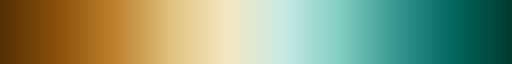

In [11]:
BrBG_10.mpl_colormap

In [12]:
layer.get_fill_color = apply_continuous_cmap(normalized_download_speed, BrBG_10, alpha=0.7)

In [13]:
layer.get_radius = normalized_download_speed * 200
layer.radius_units = "meters"
layer.radius_min_pixels = 0.5

In [14]:
m 

Map(layers=[ScatterplotLayer(get_fill_color=<pyarrow.lib.FixedSizeListArray object at 0x00000273C7C62820>
[
  …